In [5]:
import numpy as np
import pandas as pd
%matplotlib inline 


In [6]:
houses_data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
houses_data.shape

(2580, 81)

In [4]:
houses_data.info() #some columns contain <0.1 of the observations... i suggest we dorp those values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [21]:
houses_data.ScreenPorch.sample(10)

587      0
250      0
378    201
67     168
182      0
416      0
739      0
246      0
331     90
477     90
Name: ScreenPorch, dtype: int64

In [6]:
houses_data['SaleBin'] = pd.cut(houses_data.SalePrice, 20, labels=False) # create a new column of the saleprice in 20 bins
houses_data.SaleBin.sample(5)

203    4
575    3
650    3
499    4
842    2
Name: SaleBin, dtype: int64

(array([  8., 107., 392., 818., 514., 301., 183.,  98.,  68.,  36.,  24.,
         11.,   8.,   2.,   3.,   2.,   4.,   0.,   0.,   1.]),
 array([ 12789.  ,  49899.55,  87010.1 , 124120.65, 161231.2 , 198341.75,
        235452.3 , 272562.85, 309673.4 , 346783.95, 383894.5 , 421005.05,
        458115.6 , 495226.15, 532336.7 , 569447.25, 606557.8 , 643668.35,
        680778.9 , 717889.45, 755000.  ]),
 <a list of 20 Patch objects>)

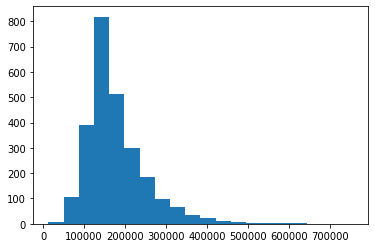

In [7]:
import matplotlib.pyplot as plt
plt.hist(houses_data.SalePrice, 20) #sale price is skewed to the right. take log of sale price

In [8]:
#Basic univariate analysis
houses_data.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleBin
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372,3.951938
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333,2.045815
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,3.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,3.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,5.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,19.000000


In [9]:
houses_data['PavedDrive'].value_counts()

Y    2336
N     184
P      60
Name: PavedDrive, dtype: int64

In [10]:
#create Age column (yr sold - yr built) for analysis

In [11]:
realtor_data = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)
realtor_data.head()

C:\Users\mobmo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [15]:
realtor_data.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [18]:
#examine basement variables since its one of the principal factors affecting prices
basement_var = houses_data[['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']].head()
basement_var

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF
1,238.0,0.0,856.0,618.0
2,552.0,393.0,1049.0,104.0
3,737.0,0.0,837.0,100.0
4,0.0,0.0,405.0,405.0
5,643.0,0.0,810.0,167.0


In [ ]:
import seaborn as sns
corr = pd.concat([basement_var, houses_data['SalePrice']], axis=1).corr()
sns.heatmap(corr)

In [23]:
print(houses_data.SalePrice.mean())
print(houses_data.Price_SF.mean())

178059.62325581396
120.90396581277793


Some Feature Engineering

In [28]:
#creating Price_per_sf variable to check how that can affect sales
houses_data['Price_SF'] = houses_data.SalePrice / houses_data.GrLivArea
houses_data.Price_SF

1      147.196262
2      132.983794
3      124.775225
4      109.720885
5      136.336336
          ...    
759    127.100840
760     80.553953
761     72.427572
762    118.078176
763    112.506541
Name: Price_SF, Length: 2580, dtype: float64

In [32]:
houses_data['TotalSF'] = houses_data.TotalBsmtSF + houses_data.GrLivArea
houses_data['TotalFloorSF'] = houses_data['1stFlrSF'] + houses_data['2ndFlrSF']

In [30]:
houses_data['HasBasement'] = houses_data.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
houses_data['HasGarage'] = houses_data.GarageArea.apply(lambda x: 1 if x > 0 else 0)
houses_data['HasPool'] = houses_data.PoolArea.apply(lambda x: 1 if x > 0 else 0)
houses_data['WasRemodeled'] = (houses_data.YearRemodAdd != houses_data.YearBuilt).astype(np.int64)
houses_data['IsNew'] = (houses_data.YearBuilt > 2000).astype(np.int64)
houses_data['WasCompleted'] = (houses_data.SaleCondition != 'Partial').astype(np.int64)
houses_data.IsNew

1      0
2      0
3      0
4      0
5      1
      ..
759    0
760    0
761    0
762    0
763    0
Name: IsNew, Length: 2580, dtype: int64

In [1]:
bool_variables = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 'WasRemodeled', 'IsNew', 'WasCompleted']

some descriptive analysis

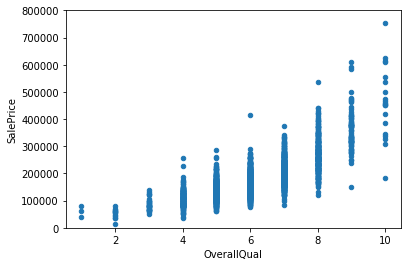

In [10]:
var = 'OverallQual'
data = pd.concat([houses_data["SalePrice"],houses_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Oldest house built in 1872. Newest house built in 2010.


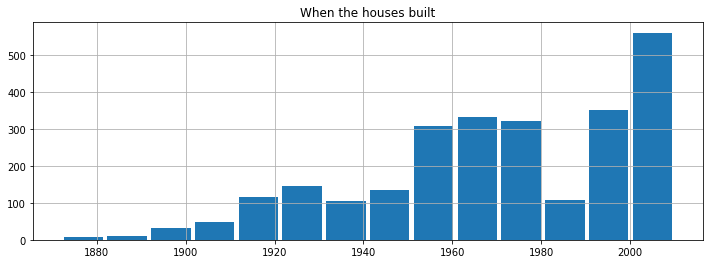

In [12]:
import matplotlib.pyplot as plt
print('Oldest house built in {}. Newest house built in {}.'.format(
    houses_data.YearBuilt.min(), houses_data.YearBuilt.max()))
houses_data.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When the houses built')
plt.show()